In [1]:
# 必要なモジュールのインポート
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model

In [2]:
# データをロード
data = load_iris()
# 特徴量
X = data.data
# ラベル
y = data.target

In [3]:
ss = ShuffleSplit(n_splits=1, #分割を1個生成
                  train_size=0.5, #学習は半分
                  test_size =0.5, #テストも半分
                  random_state=0) #乱数種（再現用）

In [4]:
# 識別器を作成
clf = linear_model.LogisticRegression()

In [5]:
# 学習データとテストデータのインデックスを作成
train_index, test_index = next(ss.split(X))

# テストデータ, 学習データ
X_test, X_train = X[test_index], X[train_index] 

# テストデータのラベル, 学習データのラベル
y_train, y_test = y[train_index], y[test_index]

In [6]:
# 識別器の学習
clf.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
# 学習データの精度
print(clf.score(X_train, y_train)) 

0.92


In [8]:
# テストデータの精度
print(clf.score(X_test, y_test))

0.84


In [10]:
ss = ShuffleSplit(n_splits=10, #分割を1個生成
                  train_size=0.5, #学習は半分
                  test_size =0.5, #テストも半分
                  random_state=0) #乱数種（再現用）

scores = []

# 学習データとテストデータのインデックスを作成
for train_index, test_index in ss.split(X):
    # テストデータ, 学習データ
    X_test, X_train = X[test_index], X[train_index] 
    
    # テストデータのラベル, 学習データのラベル
    y_train, y_test = y[train_index], y[test_index]
    
    # 識別器の学習
    clf.fit(X_train, y_train)
    # テストデータの精度
    score = clf.score(X_test, y_test)
    scores.append(score)

scores = np.array(scores)

print(scores)

[0.84       0.93333333 0.90666667 1.         0.90666667 0.93333333
 0.94666667 1.         0.90666667 0.88      ]


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\l

In [11]:
scores.mean()

0.9253333333333333

In [13]:
scores.std()

0.04702717890279574

In [14]:
print("{0} +/- {1}".format(scores.mean(), scores.std()))

0.9253333333333333 +/- 0.04702717890279574


In [16]:
print("{0:4.2f} +/- {1:4.2f} %".format(scores.mean() * 100, scores.std() * 100))

92.53 +/- 4.70 %


In [17]:
# matplotlibの準備
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# 学習データの分量を0.1,0.2,.....1.0に
train_sizes = np.arange(0.1, 1.0, 0.1)

In [20]:
all_mean = []
all_std = []

for train_size in train_sizes:
    
    ss = ShuffleSplit(n_splits=100,
                     train_size=train_size,
                     test_size= 1-train_size)
    
    scores = []
    
    for train_index, test_index in ss.split(X):
        
        # テストデータ, 学習データ
        X_test, X_train = X[test_index], X[train_index] 
        
        # テストデータのラベル, 学習データのラベル
        y_train, y_test = y[train_index], y[test_index]
        
        # 識別器の学習
        clf.fit(X_train, y_train)
        # テストデータの精度
        score = clf.score(X_test, y_test)
        scores.append(score)
    
    scores = np.array(scores)
    print("train_size {0:.0f}%: {1:4.2f} +/- {2:4.2f} %".format(train_size * 100,
                                                              scores.mean() * 100,
                                                              scores.std() * 100))
    
    all_mean.append(scores.mean() * 100)
    all_std.append(scores.std() * 100)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\l

train_size 10%: 76.13 +/- 11.40 %
train_size 20%: 86.12 +/- 9.53 %


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\l

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\l

train_size 30%: 89.44 +/- 7.12 %
train_size 40%: 91.84 +/- 5.38 %


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\l

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\l

train_size 50%: 93.81 +/- 3.44 %
train_size 60%: 93.95 +/- 3.80 %


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\l

train_size 70%: 94.98 +/- 3.32 %


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\l

train_size 80%: 94.97 +/- 4.01 %


C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\l

train_size 90%: 95.93 +/- 4.61 %


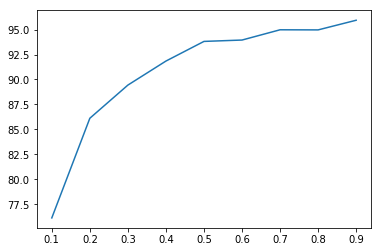

In [21]:
plt.plot(train_sizes, all_mean)

(0, 1)

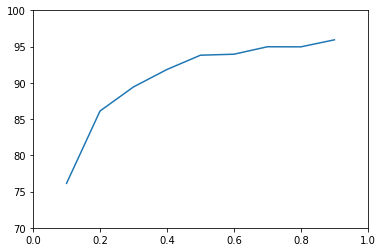

In [23]:
plt.plot(train_sizes, all_mean)
plt.ylim(70, 100)
plt.xlim(0,1)

Text(0.5, 1.0, 'Average of 10 hold-out tests for different training size')

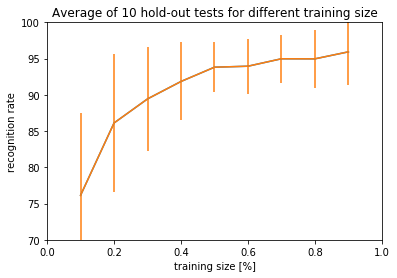

In [24]:
plt.plot(train_sizes, all_mean)
plt.ylim(70, 100)
plt.xlim(0,1)
plt.errorbar(train_sizes, all_mean, yerr=all_std)
plt.xlabel("training size [%]")
plt.ylabel("recognition rate")
plt.title("Average of 10 hold-out tests for different training size")